In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# plt.rc("figure", autolayout=True)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 8.0)

import pandas as pd
import geopandas as gpd
plot_dataframe = gpd.plotting.plot_dataframe
import numpy as np
import itertools

EPSG=2263 # projection

RAWDATA_DIR = "NYC_data/raw_data"

nycdistrs=gpd.read_file("NYC_data/nysd_16c/nysd.shp").to_crs(epsg=EPSG)

Text(1.5,15000,'middle')

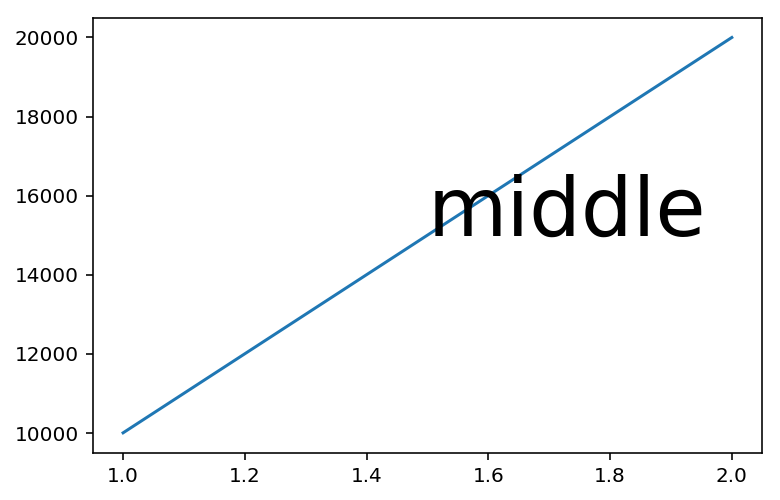

In [3]:
plt.plot([1,2], [10000, 20000])
ax = plt.gca()
ymin,ymax = plt.ylim()
# Get dimensions of y-axis in pixels
y1, y2 = ax.get_window_extent().get_points()[:, 1]
# Get unit scale
yscale = (y2-y1)/(ymax-ymin)
plt.text(1.5, 15000.0, "middle", fontsize=2000*yscale)

In [4]:
ax.get_window_extent().get_points()[:, 1]

array([ 32.5 , 256.94])

In [5]:
ext=ax.get_window_extent()

In [6]:
def schdistr_labels(ax, color="black", alpha=0.5, scaleup=1.0, **kwargs):
    ymin,ymax = plt.ylim()
    # Get dimensions of y-axis in pixels
    y1, y2 = ax.get_window_extent().get_points()[:, 1]
    # Get unit scale
    yscale = (y2-y1)/(ymax-ymin)
    for irow in range(nycdistrs.shape[0]):
        row = nycdistrs.loc[irow, :]
        geom = row.geometry
        schdistr = row.SchoolDist
        square_side = np.sqrt(geom.area)
        center = geom.representative_point()
        plt.text(center.x, center.y, 
                 schdistr,
                 horizontalalignment="center",
                 verticalalignment="center",
                 fontweight="black",
                 color=color,
                 alpha=alpha,
                 fontsize=max(square_side * yscale / 3 * scaleup, 10),
                 **kwargs
                 )


/Users/imolk/bin/venv_python3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(905464.7388458243, 1075092.8784027107, 112485.76064956379, 280480.4142586858)

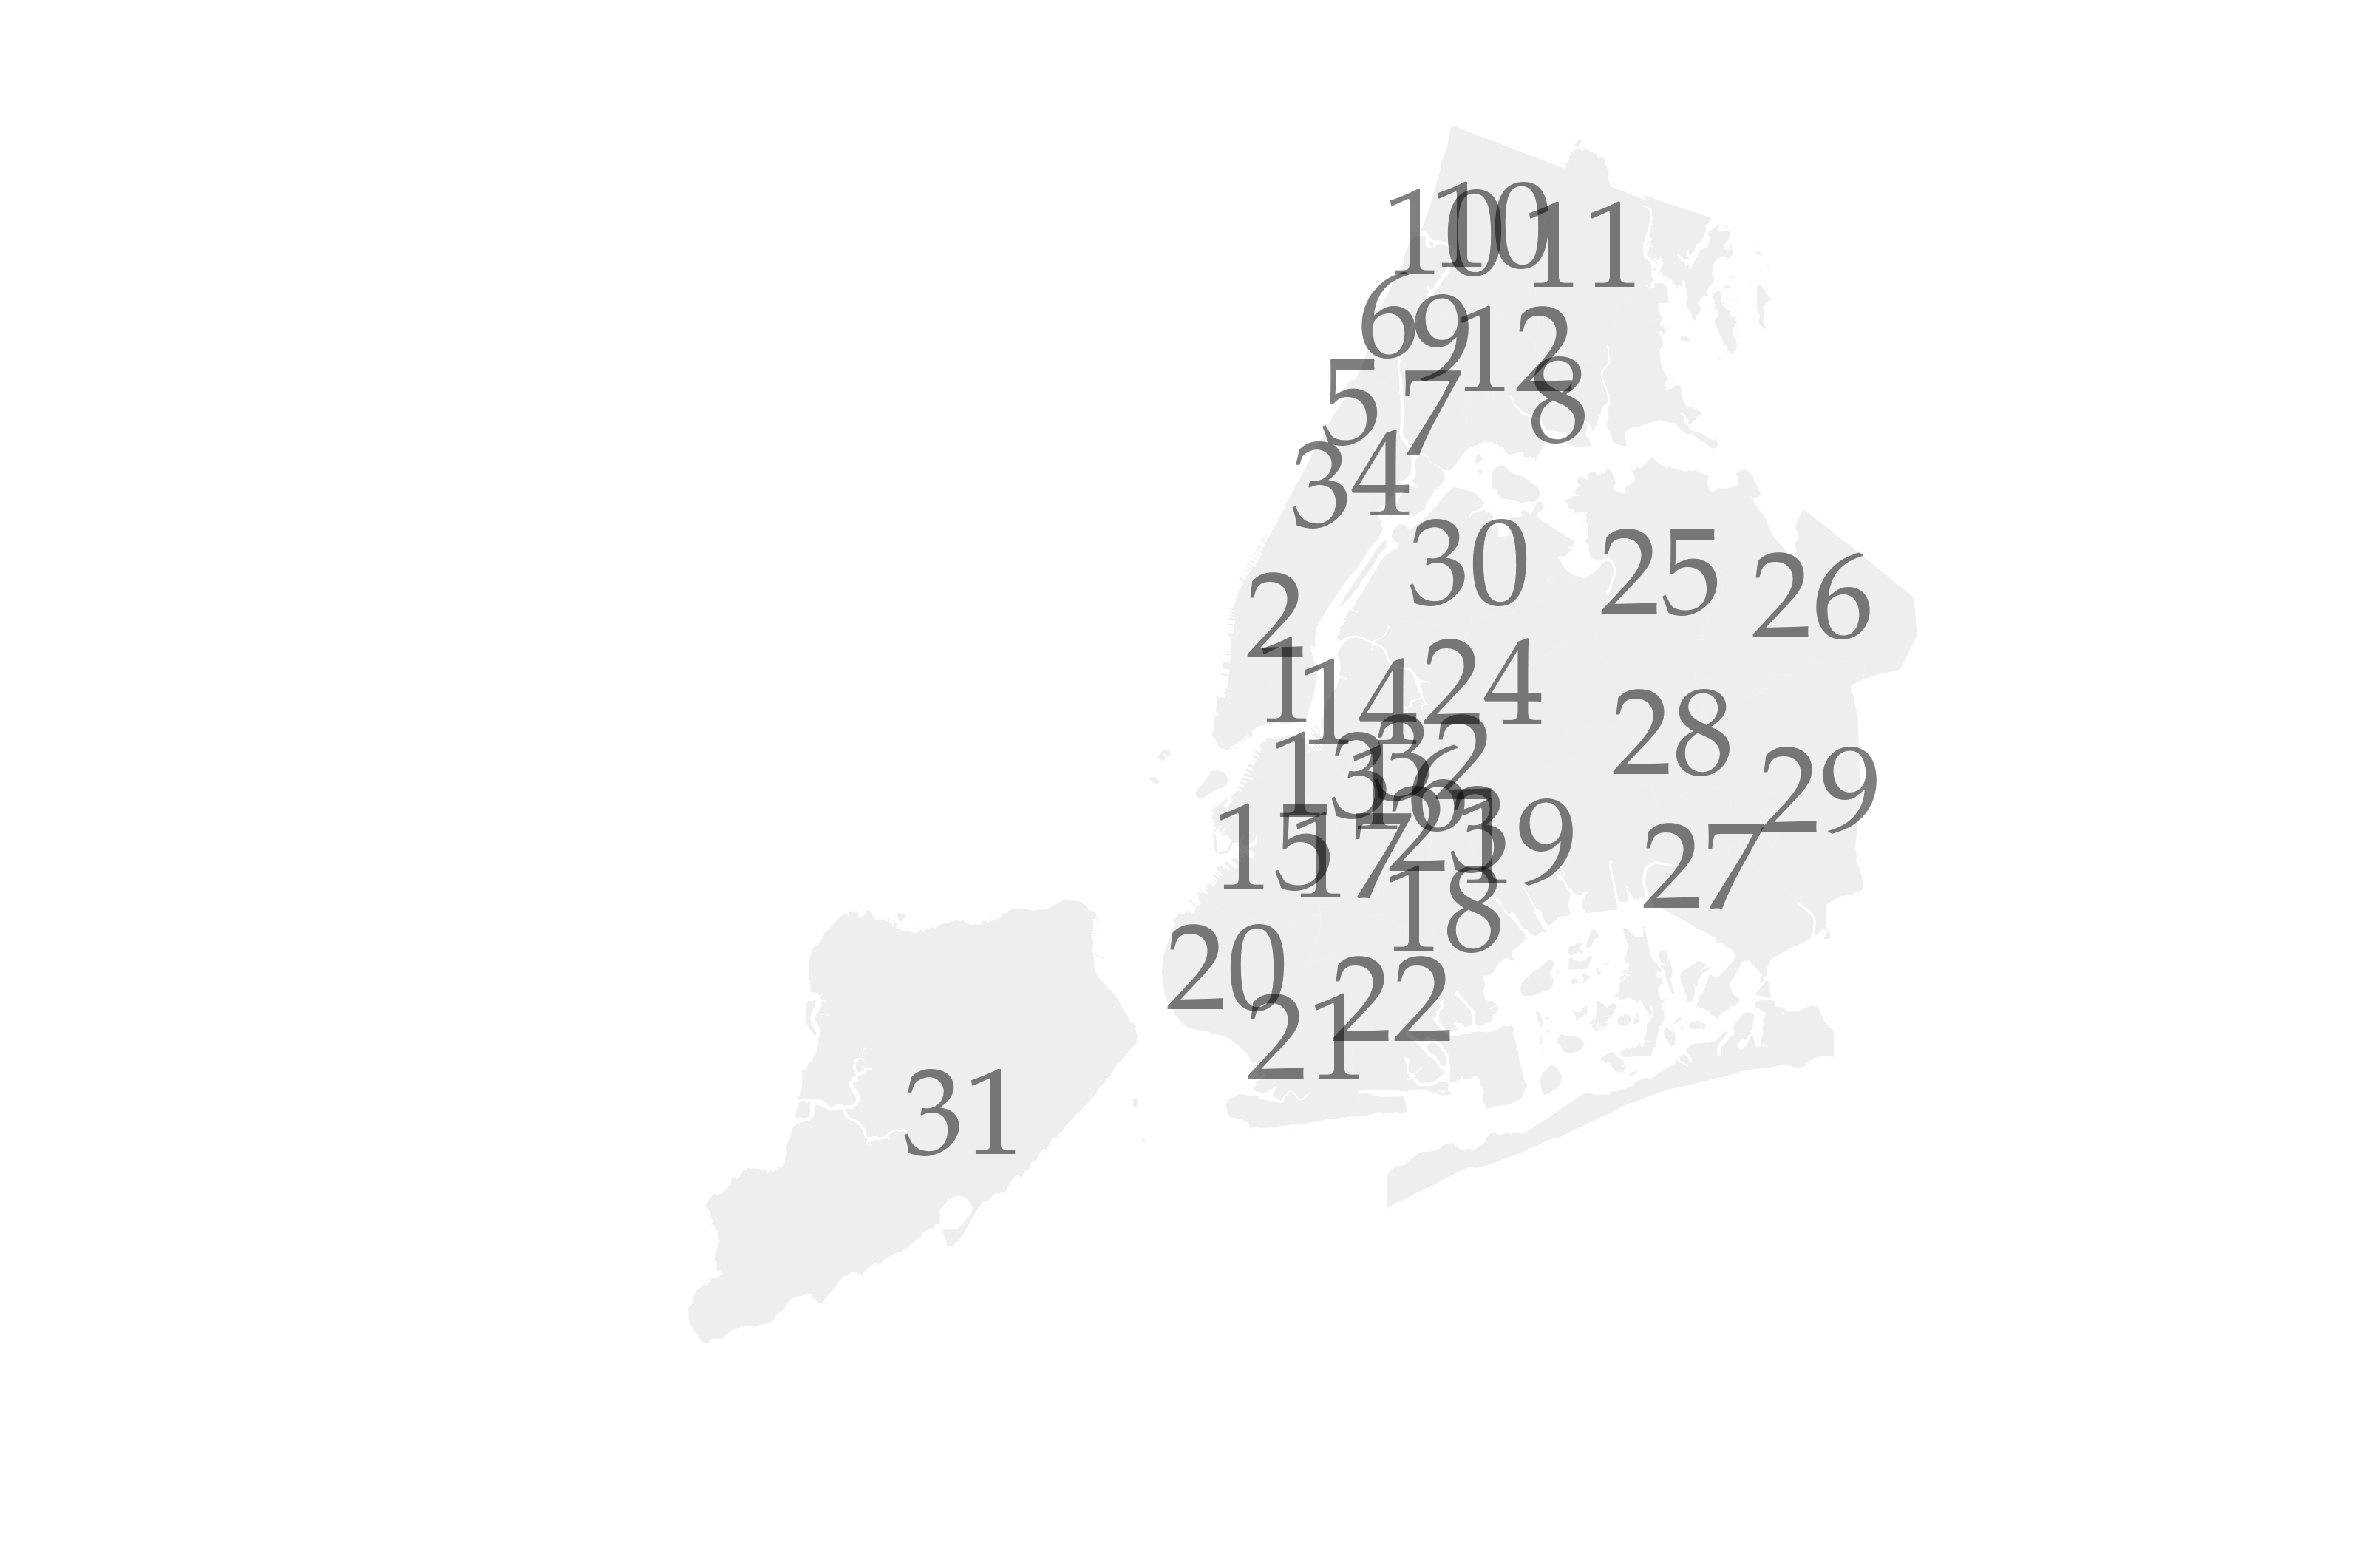

In [23]:
plot_dataframe(nycdistrs, color="#EEEEEE", figsize=(24.0, 16.0), ax=plt.gca())

ymin,ymax = plt.ylim()
# Get dimensions of y-axis in pixels
y1, y2 = plt.gca().get_window_extent().get_points()[:, 1]
# Get unit scale
yscale = (y2-y1)/(ymax-ymin)

schdistr_representative = {}
for irow in range(nycdistrs.shape[0]):
    row = nycdistrs.loc[irow, :]
    geom = row.geometry
    schdistr = row.SchoolDist
    square_side = np.sqrt(geom.area)
    center = geom.representative_point()
    schdistr_representative[str(schdistr)] = [center.x, center.y]
    plt.text(center.x, center.y, 
             schdistr,
             horizontalalignment="center",
             verticalalignment="center",
             fontweight="black",
             color="black",
             alpha=0.5,
             fontsize=20,
             )

plt.axes().set_aspect('equal', 'datalim')
plt.axis("off")

In [24]:
import json
json.dumps
json.dump(schdistr_representative, 
    open("NYC_data/processed/SchoolDistrict_reprpoints/schdistr_representative.json", "w"))

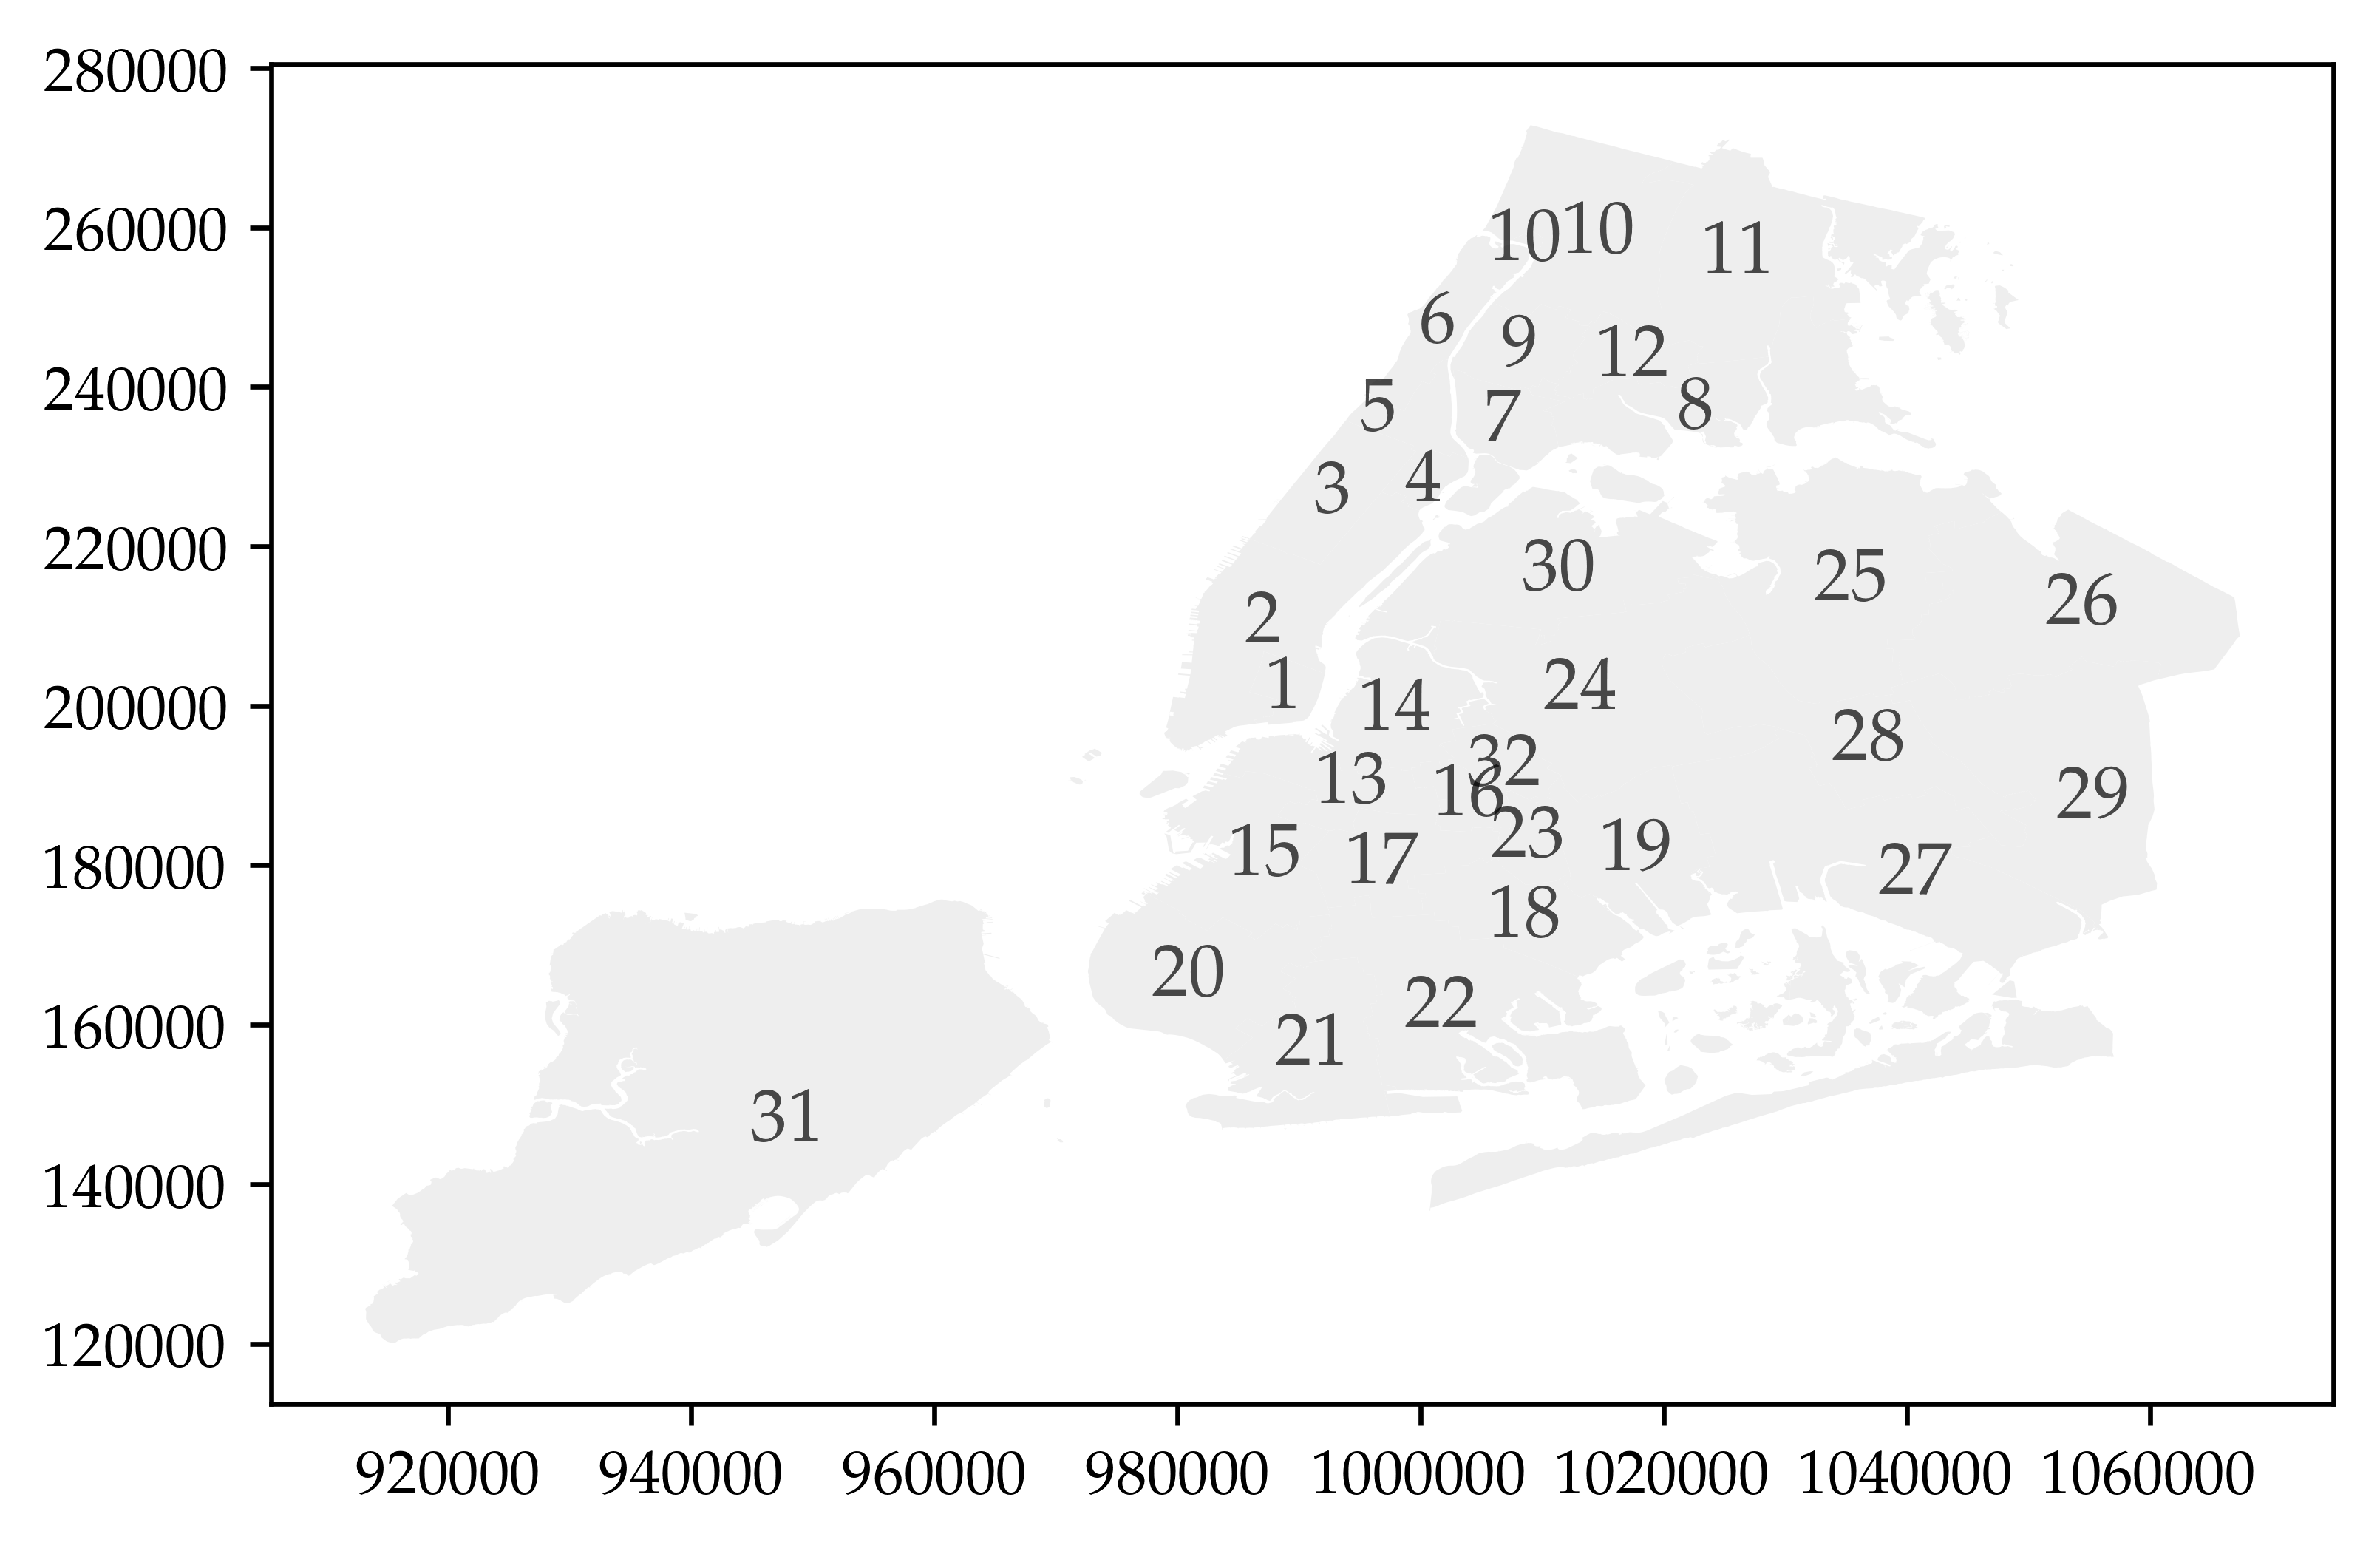

In [9]:
import NYC_prepare_plots
plt.rc("figure", dpi=300.0)
plt.rc("figure", figsize=(6,4))
# plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=True)
plt.rc("font", family="DejaVu Sans")
plt.rc("font", serif="Palatino")
plot_dataframe(nycdistrs, color="#EEEEEE", figsize=(24.0, 16.0), ax=plt.gca())
NYC_prepare_plots.schdistr_labels(plt.gca(), color="black", alpha=0.7, scaleup=1.0)